<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера</h1>

Привет! Меня зовут - Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можшь писать свои комментарии, по возможности выделяй их также цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".

# Аналитика в авиакомпании

На первом шаге проекта нами был написан парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года.

Далее был проведен исследовательский анализ данных с помощью sql:
 - найдено количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта;
 - посчитано количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре;
 - посчитано среднее количество прибывающих рейсов в день для каждого города за август 2018 года. 

На шаге 3 была проверена гипотеза, о том что количество рейсов во время фестивалей увеличивается
 - установили фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили;
 - для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество рейсов flights_amount);
 - на основании полученных данных, было предположено, что фестивали не оказывают влияния на покупку билетов на рейсы в разные города;

Для дальнейшего анализа будем работать с выгрузкой данных query_1.csv, query_3.csv.

Подгрузим библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Получаем данные из первого запроса.

In [3]:
df = pd.read_csv('/datasets/query_1.csv')
df.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Имеем 8 типов воздушных судов и количество выполненных рейсов. С типами данных все в порядке.


In [5]:
df2 = pd.read_csv('/datasets/query_3.csv')
df2.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Проверим на всякий случай на дубликаты.

In [7]:
df2=df2.drop_duplicates()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


Город и среднее число рейсов в день в августе 2018 года. Дубликатов нет. Типы данных корректные.
<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий ревьюера</h1>

Ты почти ничего не написала про данные, которыми мы располагаем. Да, данные достаточно чистые, но все же есть определенные особенности, которые стоит подчеркнуть.
    
Здесь можно было отметить, что у нас в распоряжении достаточно небольшие наборы агрегированных данных. С этим может быть связан ряд ограничений.
</div>

Найдем топ-10 городов по числу рейсов в день.

In [8]:
top10 = df2.sort_values(by = 'average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим график модели самолетов и количество рейсов.

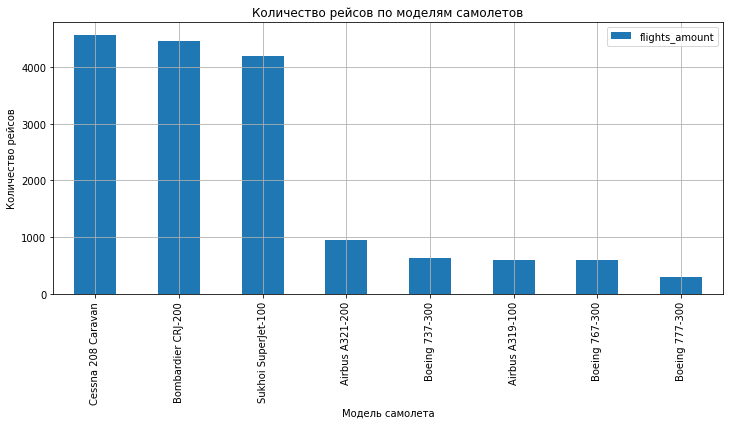

In [9]:
(df    
         .pivot_table(index='model', values='flights_amount').sort_values(by = 'flights_amount', ascending = False)
         .plot(kind='bar', grid=True, figsize=(12, 5), title='Количество рейсов по моделям самолетов')
);
plt.xlabel('Модель самолета');
plt.ylabel('Количество рейсов');

По графику видно, что наибольшее число рейсов совершают самолеты Bombardier CRJ-200	4446, Cessna 208 Caravan, Sukhoi SuperJet-100. Предполжим, что это связано с тем, что это ближнемагистральные самолеты, которые летаютн на небольшие расстояния, поэтому в связи с короткой длительностью рейса имеют возможность совершать больше рейсов.	

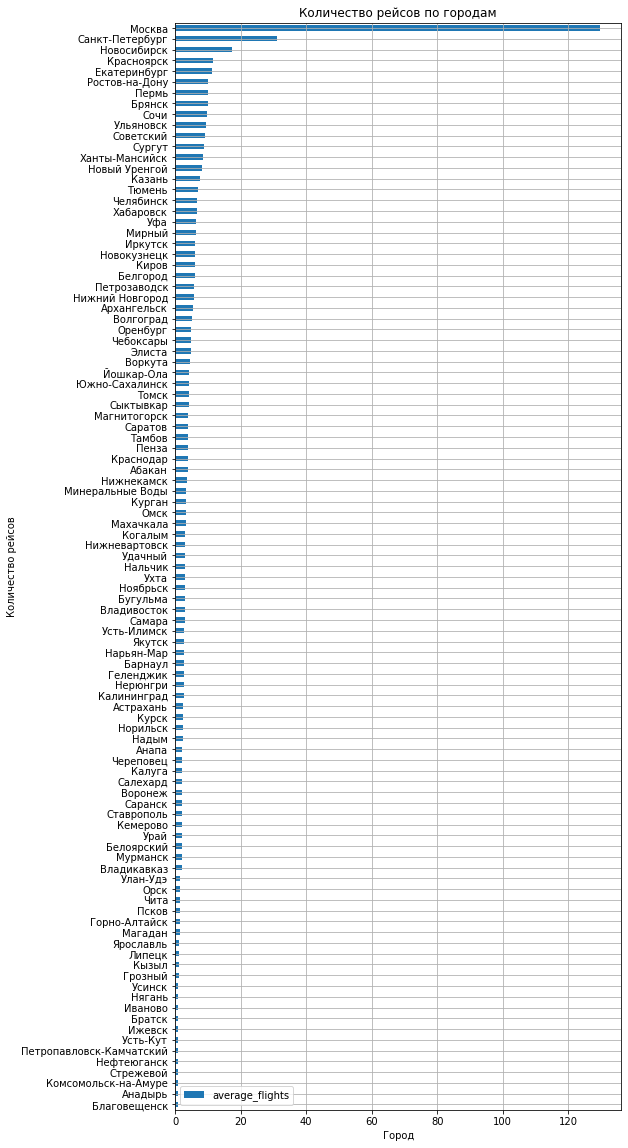

In [19]:
(df2    
         .pivot_table(index='city', values='average_flights').sort_values(by = 'average_flights', ascending = True)
         .plot(kind='barh', grid=True, figsize=(8, 20), title='Количество рейсов по городам')
);
plt.xlabel('Город');
plt.ylabel('Количество рейсов');

Между лидерами и аутсайдерами разница в количестве рейсов видна на порядок. В Сочи в агусте 2018ого совершалось в среднем 9,5 рейсов в день? Хм, неправдоподобно. Может это данные по одной авиакомпании?


 
 Постоим график топ-10 городов и количеству рейсов для детального рассмотрения.

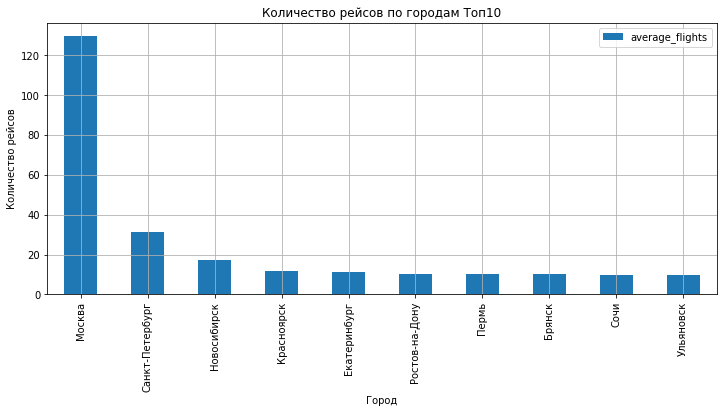

In [31]:
(top10    
         .pivot_table(index='city', values='average_flights').sort_values(by = 'average_flights', ascending = False)
         .plot(kind='bar', grid=True, figsize=(12, 5), title='Количество рейсов по городам Топ10')
);
plt.xlabel('Город');
plt.ylabel('Количество рейсов');

Получаем логичное распределение количества рейсов по городам: Больше всего рейсов совершается в Москву - крупнейший хаб. Далее идут Питер и Новосибирск - крупнейшие города России по численности населения. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера</h1>
Хорошо, все графики построены верно. Столбчатая диаграмма - подходящий выбор. Отлично, что ты сделала сортировку и горизонтальное расположение самого большого графика также верное решение
</div>

### Общий вывод:

Тким образом, в ходе исследования мы вынесли предположение, что фестивали не оказывают влияния на покупку билетов на рейсы в разные города. 
Также проанализировали модели самлетов, частоту выполняемых ими рейсов и число рейсов по городам России.\

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Общий комментарий по проекту</h1>

Ты в целом все верно построила и рассчитала. Но ты не достаточно подробно описала полученные результаты, анализ можно было сделать поподробнее даже для такого небольшого проекта, а ведь именно это самое важное для клиента.
    
Например, о чем нам говорит картина с популярными самолетами? Как нам развиваться? Куда вкладываться?
    
Что мы можем сказать по картине с городами? Да, Москва - лидер и очень серьезный, но стоит ли там развивать свой бизенес? Или рынок там наоборот слишком перегружен? Или вложится в Новосибирское направление? Крупный транспортный узел, который может быть недостаточно загружен?
    
    
Какие данные тебе нужны для дальнейшего анализа? Какие гипотезы ты можешь выдвинуть? Как будешь их проверять?
    
    
Вот это будет ценно для клиента.
</div>